<center><h1> Introduction to NLP </h1></center>

<img src="https://www.blumeglobal.com/wp-content/uploads/2018/11/NLP-image-scaled.jpg" width=500 />


# Import Libraries

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import re
import string
# !pip install wordcloud
from wordcloud import WordCloud

from textblob import TextBlob

import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import word2vec




from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline


from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense

import transformers
from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          TextClassificationPipeline)

import joblib

import shap

# Import Data & Explore

In [16]:
data = pd.read_csv("../../data/raw/Tweets_2.csv")

In [17]:
data

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative


In [18]:
data['text'].sample(1).values[0]

'my boss is bullying me...'

In [19]:
data['text'].sample(1).values[0]

'my boss is bullying me...'

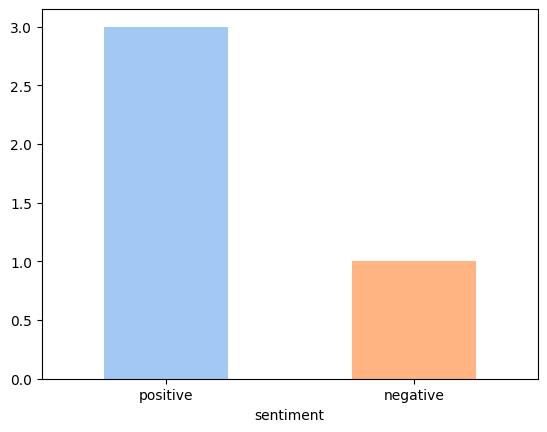

In [20]:
data['sentiment'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))
plt.xticks([0,1],['positive', 'negative'], rotation=0);

# Data EDA & Preprocessing (Cleaning and Inspecting)

In [21]:
data.isna().sum()

text         0
sentiment    0
dtype: int64

### Text character-wise cleaning

In [22]:
# regex:
#     match pattern in a string
#     handle when pattern is found
    
# re.sub(pattern, replacement, text)

# if an alphabet => keep

"match the pattern of data"  # @ & number  

# nltk: natural language tool-kit
#     dictionaries
#     collection of words
#     functions: stemming lemmatization, detect pos-tags

# string
#     string punctuations 


'match the pattern of data'

In [23]:
def change_case_lower(text):
    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    
    return sample

def remove_url(text):
    sample = text
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    
    return sample

def remove_html(text):
    sample = text
    comp = re.compile(r'<.*?>')
    sample = re.sub(comp, '', sample)
    
    return sample

def remove_punctuations(text):
    sample = text
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('[%s]' % re.escape(string.punctuation), '', sample) #punctuations
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    
    return sample

only_english = set(nltk.corpus.words.words())
def remove_special_characters(text):
    sample = text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = ' '.join([w for w in nltk.wordpunct_tokenize(sample) if w.lower() in only_english or not w.isalpha()]) #doesn't remove indian languages
    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english
    sample = " ".join([x.strip() for x in sample.split()])
    
    return sample
    

def remove_hashtags_total(text):
    sample = text
    sample = re.sub('#', ' ', sample)
    
    return sample

def remove_hashtags_only(text):
    sample = text
    sample = ' '.join([x for x in s.split() if not x.startswith('#')])
    
    return sample

def remove_emojis(text):
    sample = text
    sample = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE).sub(r'', sample) #emojis and symbols
    return sample

In [ ]:
s = """@DrBiden Ask Joe about his thoughts <b> on packing </b> the Supreme Court. 😅😄 He seem to have any after 50 years in politics. #JoeBiden ...more sinister" \\n\\n#Covid19UK \\n#Covid #News \\n\\nJust enter "empty testing stations" СВОИМИ РУКАМИ into your search engIne and https://t.co/omPuIJzVnl"""
s

**URLs and Hyperlinks**

In [ ]:
remove_url(s)

**remove HTML Tags**

In [ ]:
remove_html(s)

**punctuations**

In [ ]:
remove_punctuations(s)

**lowercase**

In [ ]:
change_case_lower(s)

**special characters like non-english languages, whitespace**

In [ ]:
remove_special_characters(s)

**hashtags**

In [ ]:
remove_hashtags_total(s)

**emojis**

In [ ]:
remove_emojis(s)

**COMPILING EVERYTHNG WITH IN-ORDER CONTEXT**

In [24]:
only_english = set(nltk.corpus.words.words())
def clean_text(text):
    
    sample = text
    sample = " ".join([x.lower() for x in sample.split()])
    sample = re.sub(r"\S*https?:\S*", '', sample) #links and urls
    sample = re.sub('\[.*?\]', '', sample) #text between [square brackets]
    sample = re.sub('\(.*?\)', '', sample) #text between (parenthesis)
    sample = re.sub('[%s]' % re.escape(string.punctuation), '', sample) #punctuations
    sample = re.sub('\w*\d\w', '', sample) #digits with trailing or preceeding text
    sample = re.sub(r'\n', ' ', sample) #new line character
    sample = re.sub(r'\\n', ' ', sample) #new line character
    sample = re.sub("[''""...“”‘’…]", '', sample) #list of quotation marks
    sample = re.sub(r', /<[^>]+>/', '', sample)    #HTML attributes

    
    sample = ' '.join([w for w in nltk.wordpunct_tokenize(sample) if w.lower() in only_english or not w.isalpha()]) #doesn't remove indian languages
    sample = ' '.join(list(filter(lambda ele: re.search("[a-zA-Z\s]+", ele) is not None, sample.split()))) #languages other than english
    print(sample)
    sample = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE).sub(r'', sample) #emojis and symbols
    print(sample)
    sample = sample.strip()
    print(sample)
    sample = " ".join([x.strip() for x in sample.split()])
    print(sample)
    
    return sample

In [25]:
data['cleaned_text'] = data['text'].apply(lambda x: clean_text(x))
data

id have if i were going
id have if i were going
id have if i were going
id have if i were going
sad i will miss you here in san
sad i will miss you here in san
sad i will miss you here in san
sad i will miss you here in san
my boss is bullying me
my boss is bullying me
my boss is bullying me
my boss is bullying me
what interview leave me alone
what interview leave me alone
what interview leave me alone
what interview leave me alone


,text,sentiment,cleaned_text
0,"I`d have responded, if I were going",neutral,id have if i were going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sad i will miss you here in san
2,my boss is bullying me...,negative,my boss is bullying me
3,what interview! leave me alone,negative,what interview leave me alone


### Text word-wise cleaning

**stop words**  

Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information. In order words, we can say that the removal of such words does not show any negative consequences on the model we train for our task.
Removal of stop words definitely reduces the dataset size and thus reduces the training time due to the fewer number of tokens involved in the training.  

The words which are generally filtered out before processing a natural language are called stop words. These are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text. Examples of a few stop words in English are “the”, “a”, “an”, “so”, “what”.  

**parts-of-speech-tagging**

<code>from nltk.corpus import wordnet
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return ''
</code>


  
    

**stemming vs lemmatizing**  

Stemming and Lemmatization are text normalization techniques.  

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.
Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for “boat” might also return “boats” and “boating”. Here, “boat” would be the stem for [boat, boater, boating, boats].   

In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words. The lemma of ‘was’ is ‘be’ and the lemma of ‘mice’ is ‘mouse’.
Lemmatization is typically seen as much more informative than simple stemming, which is why Spacy has opted to only have Lemmatization available instead of Stemming

>Stemming and Lemmatization both generate the foundation sort of the inflected words and therefore the only difference is that stem may not be an actual word whereas, lemma is an actual language word.
Stemming follows an algorithm with steps to perform on the words which makes it faster. Whereas, in lemmatization, you used a corpus also to supply lemma which makes it slower than stemming. you furthermore might had to define a parts-of-speech to get the proper lemma.

In [26]:
# Caching stopwords outside for better speed
stops = set(stopwords.words('english'))
def remove_stop_words(text, cores = 2):
    
    sample = text
    sample = sample.lower()
    sample = [word for word in sample.split() if not word in stops]
    sample = ' '.join(sample)
    
    return sample


# get POS Tag for word
def get_wordnet_pos(word):
    
    treebank_tag = nltk.pos_tag([word])[0][1]
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

# Lemmatizing the data
# Steps to convert : Document -> Sentences -> Tokens -> POS -> Lemmas
lemmatizer = WordNetLemmatizer()
def lemma_clean_text(text, cores = 1):
 
    sample = text
    sample = sample.split()
    sample = [lemmatizer.lemmatize(word.lower(), get_wordnet_pos(word.lower())) for word in sample]
    sample = ' '.join(sample)
    
    return sample


# Stemming the data
ps = PorterStemmer()
def stem_clean_text(text):
 
    sample = text
    sample = sample.split()
    sample = [ps.stem(word) for word in sample]
    sample = ' '.join(sample)
    
    return sample

def correct_spelling(text):
    
    sample = text
    sample = str(TextBlob(text).correct())
    
    return sample

# wordninja=>spell correct
# profanity filter

In [ ]:
s

**stop words**

In [ ]:
remove_stop_words(s)

**stemming**

In [ ]:
stem_clean_text(s)

**lemmatizing**

In [ ]:
lemma_clean_text(s)

**spell checking**

In [27]:
stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
def correct_text(text, stem=False, lemma=False, spell=False):
    if lemma and stem:
        raise Exception('Either stem or lemma can be true, not both!')
        return text
    
    sample = text
    
    #removing stopwords
    sample = sample.lower()
    sample = [word for word in sample.split() if word not in stops]
    sample = ' '.join(sample)
    
    if lemma:
        new_sample = []
        sample = sample.split()
        word_tags = [get_wordnet_pos(word.lower()) for word in sample]
        for word in sample:
            word_tag = word_tags[sample.index(word)]
            if word_tag == "":
                new_sample.append(lemmatizer.lemmatize(word))
            else:
                new_sample.append(lemmatizer.lemmatize(word.lower(), word_tag))
        sample = ' '.join(new_sample)
        
    if stem:
        sample = sample.split()
        sample = [ps.stem(word) for word in sample]
        sample = ' '.join(sample)
    
    if spell:
        sample = str(TextBlob(text).correct())
    
    return sample

In [28]:
data['correct_text'] = data['cleaned_text'].apply(lambda x: correct_text(x, lemma=True))
data

,text,sentiment,cleaned_text,correct_text
0,"I`d have responded, if I were going",neutral,id have if i were going,id go
1,Sooo SAD I will miss you here in San Diego!!!,negative,sad i will miss you here in san,sad miss san
2,my boss is bullying me...,negative,my boss is bullying me,bos bullying
3,what interview! leave me alone,negative,what interview leave me alone,interview leave alone


### Feature Extraction and EDA

**word count**

In [29]:
data['word_count'] = data['correct_text'].apply(lambda x: len(str(x).split(" ")))
data[['correct_text','word_count']]

,correct_text,word_count
0,id go,2
1,sad miss san,3
2,bos bullying,2
3,interview leave alone,3


<Axes: xlabel='word_count'>

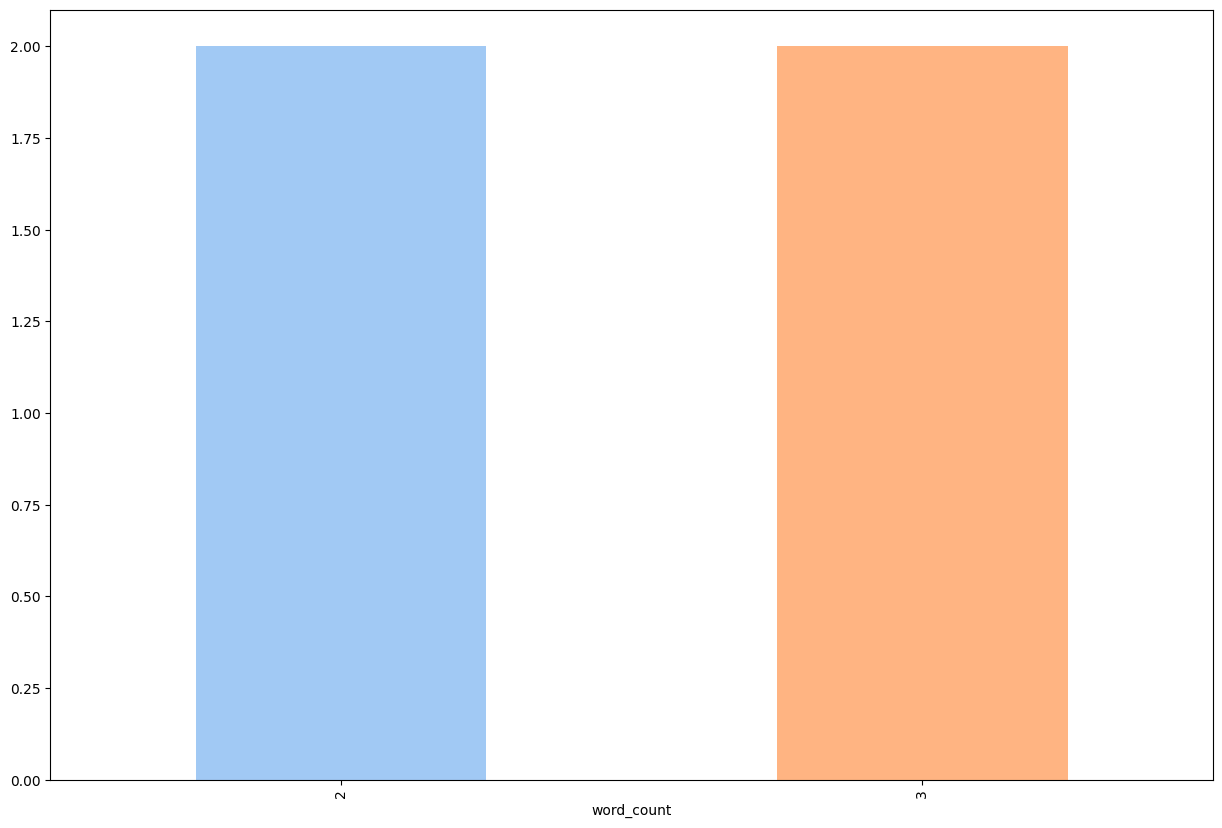

In [30]:
plt.figure(figsize=(15,10))
data['word_count'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))

**character count**

In [31]:
data['char_count'] = data['correct_text'].str.len() ## this also includes spaces
data[['correct_text','char_count']]

,correct_text,char_count
0,id go,5
1,sad miss san,12
2,bos bullying,12
3,interview leave alone,21


<Axes: xlabel='char_count'>

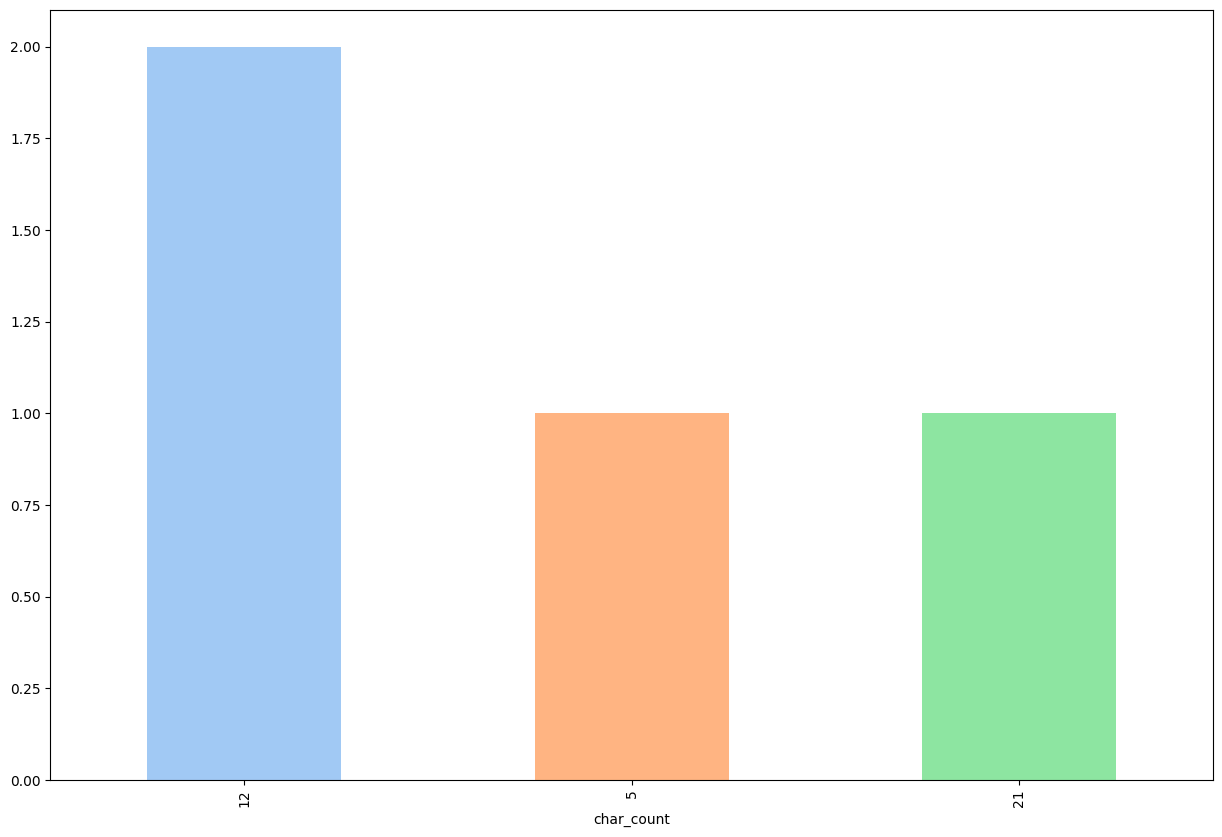

In [32]:
plt.figure(figsize=(15,10))
data['char_count'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))

**average word count**

In [33]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/(len(words)+0.000001))

data['avg_word'] = data['correct_text'].apply(lambda x: avg_word(x)).round(1)
data[['correct_text','avg_word']].head()

,correct_text,avg_word
0,id go,2.0
1,sad miss san,3.3
2,bos bullying,5.5
3,interview leave alone,6.3


<Axes: xlabel='avg_word'>

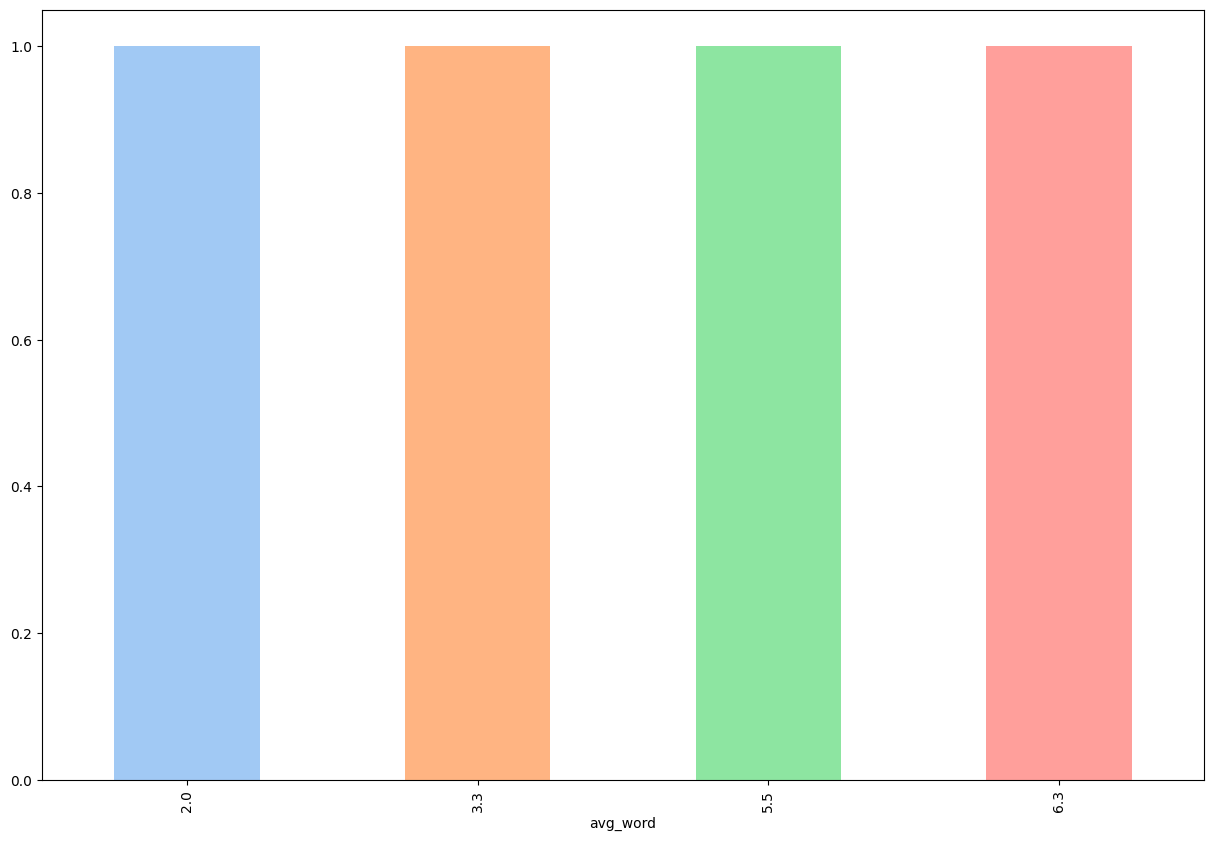

In [34]:
plt.figure(figsize=(15,10))
data['avg_word'].value_counts().plot(kind='bar', color=sns.color_palette('pastel'))

In [35]:
final_data = data[['correct_text', 'word_count', 'char_count', 'avg_word', 'sentiment']]
final_data

,correct_text,word_count,char_count,avg_word,sentiment
0,id go,2,5,2.0,neutral
1,sad miss san,3,12,3.3,negative
2,bos bullying,2,12,5.5,negative
3,interview leave alone,3,21,6.3,negative


## Word Clouds

Check: https://www.kaggle.com/code/arthurtok/spooky-nlp-and-topic-modelling-tutorial/notebook

### Positive Tweets

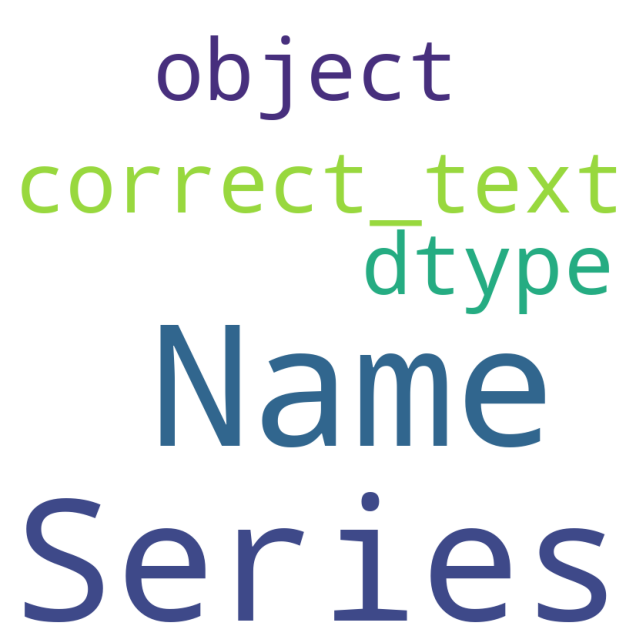

In [36]:
g = str(data[data['sentiment']==0]['correct_text'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

### Negative Tweets

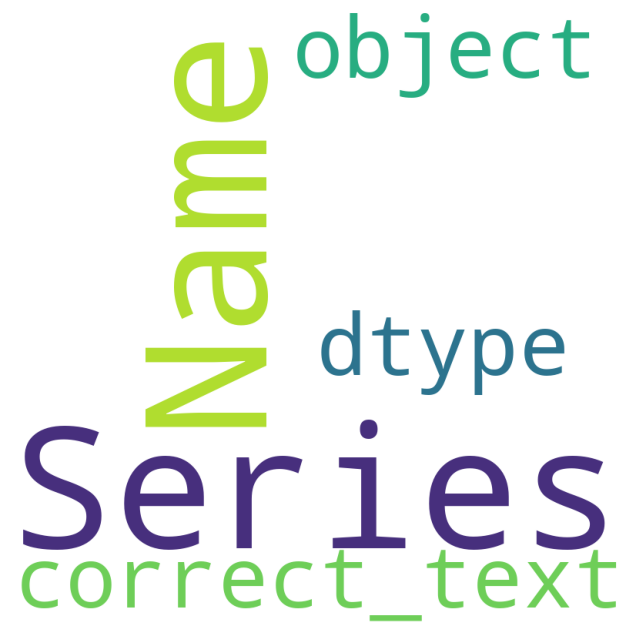

In [37]:
g = str(data[data['sentiment']==1]['correct_text'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(g)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 
  
plt.show()

# Corpus Assembly & Modeling

### Word Embeddings

Checkout this great blog from [Turing](https://www.turing.com/kb/guide-on-word-embeddings-in-nlp)

In [38]:
X = final_data.drop(columns=['sentiment'])
y = final_data['sentiment']
z = final_data.drop(columns=['correct_text', 'sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [39]:
X_train.isna().sum()

correct_text    0
word_count      0
char_count      0
avg_word        0
dtype: int64

 y-> target  
x -> text  
z -> other numerical features

In [40]:
z_train = X_train.drop(columns=['correct_text'])
z_test = X_test.drop(columns=['correct_text'])

X_train = X_train['correct_text']
X_test = X_test['correct_text']

In [41]:
X_train.fillna(" ", axis=0, inplace=True)
X_test.fillna(" ", axis=0, inplace=True)
y_train.fillna(0.0, inplace=True)
y_test.fillna(1.0, inplace=True)

In [51]:
X_train

1             sad miss san
3    interview leave alone
Name: correct_text, dtype: object

In [50]:
type(z_test)

pandas.core.frame.DataFrame

**BagOfWords (CBOW)**


The idea is to analyze the documents. The document here refers to a unit. In case we want to find all the negative tweets during the pandemic, each tweet here is a document. To obtain the bag of words we always perform all those pre-requisite steps like cleaning, stemming, lemmatization, etc… Then we generate a set of all the words that are available before sending it for modeling. We can get repeated words within our document. A better representation is a vector form, that can tell us how many times each word can occur in a document. The following is called a document term matrix and is shown below:

<img src="https://qph.fs.quoracdn.net/main-qimg-27639a9e2f88baab88a2c575a1de2005">

row1: "Today is independence day" {"Today":0, "is": 1, "independence": 2, "day": 3}
row2: "independence day is celebrated"  {"independence":0, "day": 1, "is": 2, "celebrated": 3}
       independece
1    (value=freq=1)

In [44]:
bow = CountVectorizer(max_features=500)

In [45]:
X_train_vect = bow.fit_transform(X_train)
X_test_vect = bow.transform(X_test)


# fit(train)
# transform(train)
# transform(test)

In [47]:
x_t1 = pd.DataFrame(X_train_vect.toarray(),columns=bow.get_feature_names_out())
x_t2 = pd.DataFrame(X_test_vect.toarray(),columns=bow.get_feature_names_out())

In [52]:
type(x_t1)

pandas.core.frame.DataFrame

In [ ]:
x_train = pd.concat([x_t1, z_train.reset_index(drop=True)], axis=1)
x_test = pd.concat([x_t2, z_test.reset_index(drop=True)], axis=1)

In [ ]:
x_train

In [ ]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [ ]:
print("logloss: %0.3f " % log_loss(y_test.values, pred))

**Tf-Idf**

One problem that we encounter in the bag-of-words approach is that it treats every word equally, but in a document, there is a high chance of particular words being repeated more often than others. if we take each sentence as a document, we can count the number of documents each time any word occurs. This method is called document-frequency. We then divide the term frequency by the document frequency of that word. This helps us with the frequency of occurrence of terms in that document and inverse to the number of documents it appears in. Thus we have the TF-IDF. The idea is to assign particular weights to words that tell us about how important they are in the document.

<img src="https://d2mk45aasx86xg.cloudfront.net/How_word_embedding_is_done_in_TF_IDF_f8cf27a728.webp" />

<img src="https://editor.analyticsvidhya.com/uploads/88298tfidf_ex3.png">

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
X_train_vect = tfidf.fit_transform(X_train)
X_test_vect = tfidf.transform(X_test)

In [ ]:
x_t1 = pd.DataFrame(X_train_vect.toarray(),columns=tfidf.get_feature_names())
x_t2 = pd.DataFrame(X_test_vect.toarray(),columns=tfidf.get_feature_names())

In [ ]:
x_t1

In [ ]:
x_train = pd.concat([x_t1, z_train.reset_index(drop=True)], axis=1)
x_test = pd.concat([x_t2, z_test.reset_index(drop=True)], axis=1)

In [ ]:
clf = MultinomialNB()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [ ]:
print("logloss: %0.3f " % log_loss(y_test.values, pred))

**Word2Vec (Skip-Gram)**

Word2Vec is widely used in most of the NLP models. It transforms the word into vectors. Word2vec is a two-layer net that processes text with words. The input is in the text corpus and the output is a set of vectors: feature vectors represent the words on that corpus.


Given enough data, usage, and conditions, Word2vec can make the most accurate predictions about the meaning of a word based on previous appearances. That guess can be used to form word-and-word combinations (eg “big” i.e. “large” to say “small” is “tiny”), or group texts and separate them by topic.


**GloVe**

GloVe – global vector for word representation. An unsupervised learning algorithm by Stanford is used to generate embedding words by combining a word matrix for the word co-occurrence of matrix from the corpus. Emerging embedded text shows an attractive line format for a word in a vector space. The GloVe model is trained in the zero-level global co-occurrence matrix, which shows how often words meet in a particular corpus.

<img src="https://editor.analyticsvidhya.com/uploads/619221_gcC7b_v7OKWutYN1NAHyMQ.png">

In [ ]:
class Word_to_Vect():
    '''Function that returns word embedding, if passed list of sentences and size of vector'''
    
    def __init__(self):
        pass
    
    def w2v(self, corpus, size):
        
        #tokenization and model preparation
        tokenize_sent = [sent.split() for sent in corpus]
        #creating vord2vec for every word in every sentence in corpus
        self.w2v = word2vec.Word2Vec(tokenize_sent, size=size, min_count=1)
        
        return self.w2v
    
    def transform(self, X_corpus, size):
        
        array_wordEmbed = []
        for sent in X_corpus:
            vec = np.zeros(size).reshape((1, size))
            count = 0.
            if sent == '':
                a = vec
            else:
                sent = sent.split(' ')
                for word in sent:
                    vec += w2v[word].reshape((1,size))
                    count +=1
            if count !=0:
                vec /= count
            a = vec
            array_wordEmbed.append(a)
        return np.concatenate(tuple(array_wordEmbed))

In [ ]:
w2v = Word_to_Vect().w2v(corpus = [sent for sent in X['correct_text']], size = len(X['correct_text']))

model's vocab gives the dictionary of words along with their vector values,  
and the values of the dictionary will give you the value of that word  

**Example**

In [ ]:
w2v.wv.similar_by_vector('bad')

# worse trump

***We can create the document-term matrix by creating a dictionary with `"word": "value"`, using the below function***

In [ ]:
X_w2v = pd.DataFrame({word:w2v.wv[word] for sent in X['correct_text'] for word in sent.split()})
X_w2v

In [ ]:
x_t1, x_t2, _, _ = train_test_split(X_w2v, y, test_size=0.33, random_state=101)

In [ ]:
x_t2

In [ ]:
x_train = pd.concat([x_t1.reset_index(drop=True), z_train.reset_index(drop=True)], axis=1)
x_test = pd.concat([x_t2.reset_index(drop=True), z_test.reset_index(drop=True)], axis=1)

In [ ]:
clf = XGBClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [ ]:
print("logloss: %0.3f " % log_loss(y_test.values, pred))

# Modelling


1. ML Algorithms
2. DL Neural Networks


### Metrics?
Same as those we use in traditional ML, and other functions such as **Perplexity** or Logloss

<a href="https://towardsdatascience.com/perplexity-in-language-models-87a196019a94"><img src="https://miro.medium.com/max/828/1*DGceUxPPeIgE-V1m3SF-SA.png"/></a>


**Machine leaning**

In [ ]:
rf = RandomForestClassifier(n_estimators=500, bootstrap=True, min_samples_split=5)
rf.fit(x_train, y_train)

In [ ]:
y_pred_ml = rf.predict(x_test)
print("logloss: %0.3f " % log_loss(y_pred_ml, pred))

**Deep learning**

In [ ]:
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
#     plot_model(model, to_file='model.png', show_shapes=True)
    return model

model = define_model(x_train.shape[1])

In [ ]:
model.fit(np.asarray(x_train), np.asarray(y_train), epochs=50, batch_size=50)
# evaluate
loss, acc = model.evaluate(np.asarray(x_test), np.asarray(y_test))
print('Test Accuracy: %f' % (acc*100))

In [ ]:
y_pred_dl = model.predict(x_test)

print("logloss: %0.3f " % log_loss(y_test, y_pred_dl.round(), eps=1e-7))